In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from konlpy.tag import Okt
from konlpy.corpus import kolaw
from collections import Counter
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 사용자 골드 티어 저장

In [11]:
df_gold=pd.read_csv('test_all.csv')
# 한 문제를 여러번 풀어서 틀리거나 맞춘 경우 파악
print("중복 : ",df_gold.duplicated().sum())
# 중복 제거
df_gold=df_gold.drop_duplicates()
p=re.compile('^Gold')
tempV=df_gold[df_gold['사용자']=='Gold V']
tempIV=df_gold[df_gold['사용자']=='Gold IV']
tempIII=df_gold[df_gold['사용자']=='Gold III']
tempII=df_gold[df_gold['사용자']=='Gold II']
tempI=df_gold[df_gold['사용자']=='Gold I']

df=pd.concat([tempIV, tempV])
df=pd.concat([df,tempIII])
df=pd.concat([df,tempII])
df=pd.concat([df,tempI])
df_gold=df.copy()
df_gold.to_csv("gold_tier.csv", encoding='utf-8-sig')
df_gold

중복 :  128


,난이도,분류,문제번호,제목,사용자,정답,메모리,시간,언어,코드길이,제출날짜
5,Silver II,백트래킹/브루트포스 알고리즘,1182,부분수열의 합,Gold IV,맞았습니다!!,2020.0,4.0,C++17,440.0,2022-04-16 17:24
13,Silver V,구현/문자열,1316,그룹 단어 체커,Gold IV,틀렸습니다,NaN,NaN,C++17,502.0,2022-04-16 17:24
20,Silver IV,수학/정수론/소수 판정/에라토스테네스의 체,1978,소수 찾기,Gold IV,틀렸습니다,NaN,NaN,Python 3,339.0,2022-04-16 17:24
23,Silver IV,자료 구조/스택/문자열,4949,균형잡힌 세상,Gold IV,맞았습니다!!,30840.0,112.0,Python 3,707.0,2022-04-16 17:24
45,Silver II,사칙연산/많은 조건 분기/구현/수학,1614,영식이의 손가락,Gold IV,컴파일 에러,NaN,NaN,Java 8,562.0,2022-04-16 17:24
...,...,...,...,...,...,...,...,...,...,...,...
10829,Gold IV,수학/누적 합,17943,도미노 예측,Gold I,틀렸습니다,NaN,NaN,C++17,966.0,2022-04-16 12:33
10848,Gold IV,자료 구조/분리 집합,1717,집합의 표현,Gold I,맞았습니다!!,6324.0,36.0,C++17,962.0,2022-04-16 12:32
10869,Silver V,구현/수학/정수론,11576,Base Conversion,Gold I,맞았습니다!!,2020.0,0.0,C++17,456.0,2022-04-16 12:31
10875,Gold III,깊이 우선 탐색/그래프 이론/그래프 탐색,9466,텀 프로젝트,Gold I,틀렸습니다,NaN,NaN,Java 11,2473.0,2022-04-16 12:31


# 골드 티어가 가장 많이 시도하는  알고리즘 유형

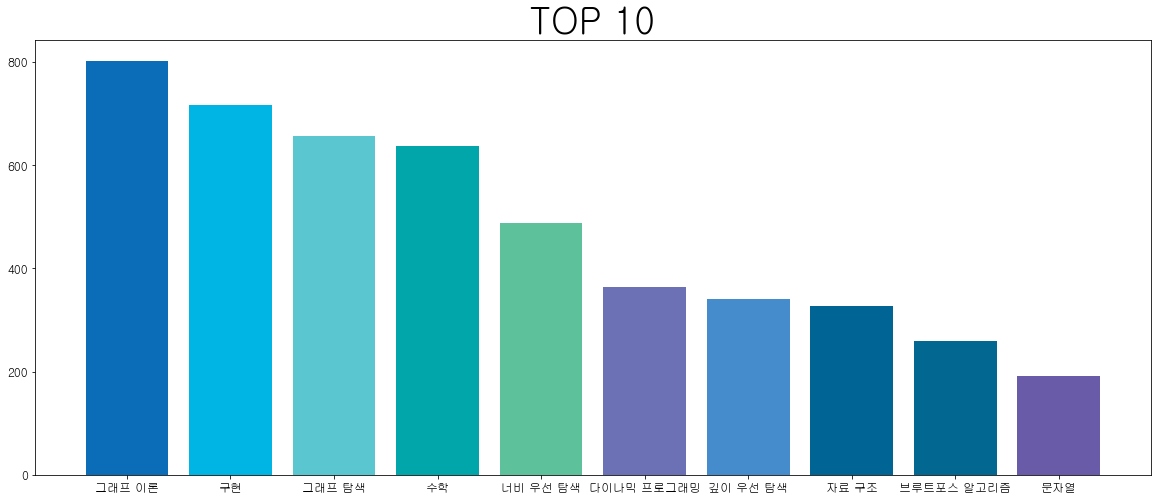

In [21]:
df_g=pd.read_csv('gold_tier.csv')
df_g['분류']=df_g['분류'].fillna('없음')
kind_of={}
for kind in df_g['분류']:
    if kind!='없음':
        temp=kind.split('/')
        for k in temp:
            if k in kind_of:
                kind_of[k]+=1
            else:
                kind_of[k]=1
            
kind_of_set=sorted(kind_of.items(), key=lambda x: x[1], reverse=True)
top_ten=0
keys=[]
values=[]
for item in kind_of_set:
    keys.append(item[0])
    values.append(item[1])
    top_ten+=1
    if top_ten>=10:
        break
        

plt.figure(figsize=(20,8))
plt.rc('font', size=12)   
plt.bar(range(10),values,color = ['#0B6DB7','#00B5E3','#5AC6D0',
                                  '#00A6A9','#5DC19B','#6C71B5','#448CCB','#006494','#026892','#6A5BA8'])
plt.xticks(range(10),keys) 
plt.rc('font', size=30) 
plt.title('TOP 10')
plt.show()



# TOP 10의 정답률

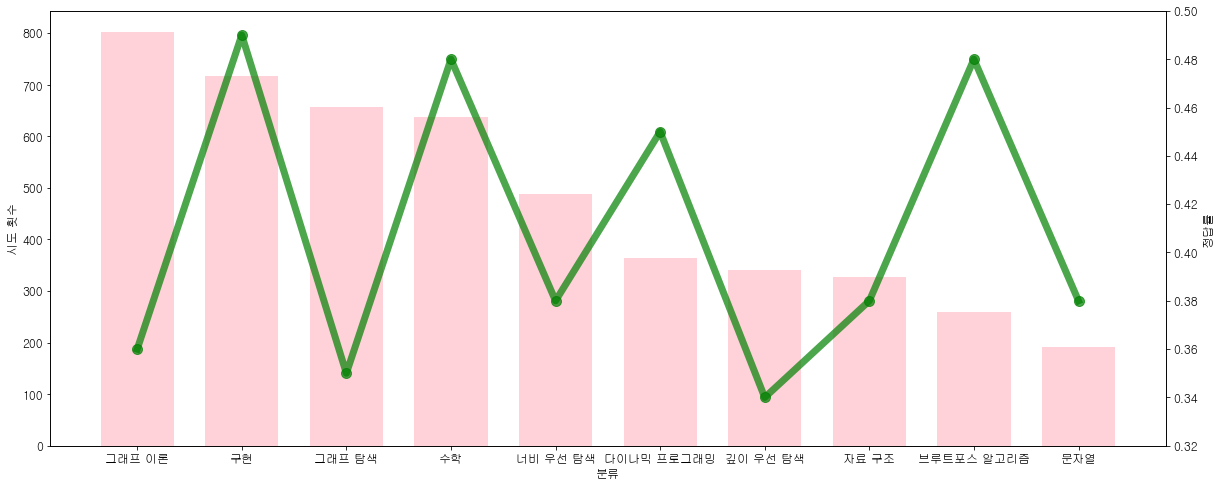

In [22]:
kind_of_s={}
for i in range(len(df_g)):
    if df_g['분류'][i]!='없음' and df_g['정답'][i]=="맞았습니다!!":
        temp=df_g['분류'][i].split('/')
        for k in temp:
            if k in kind_of_s:
                kind_of_s[k]+=1
            else:
                kind_of_s[k]=1
ans=[]
for i in range(len(keys)):
    ans.append(kind_of_s[keys[i]]/values[i])
    
ans=list(map(lambda x:round(x,2),ans))


plt.rc('font', size=12) 
fig,ax1=plt.subplots(figsize=(20,8))
ax1.bar(range(10),values,color ='pink',alpha=0.7,width=0.7)
ax1.set_xlabel("분류")
ax1.set_ylabel("시도 횟수")
ax2=ax1.twinx()
ax2.set_ylim([0.32, 0.50])
ax2.plot(keys,ans, color='green', linewidth=7, alpha=0.7, marker="o", markersize=10)

ax2.set_ylabel("정답률")
plt.show()




# 김명주 vs 골드 티어

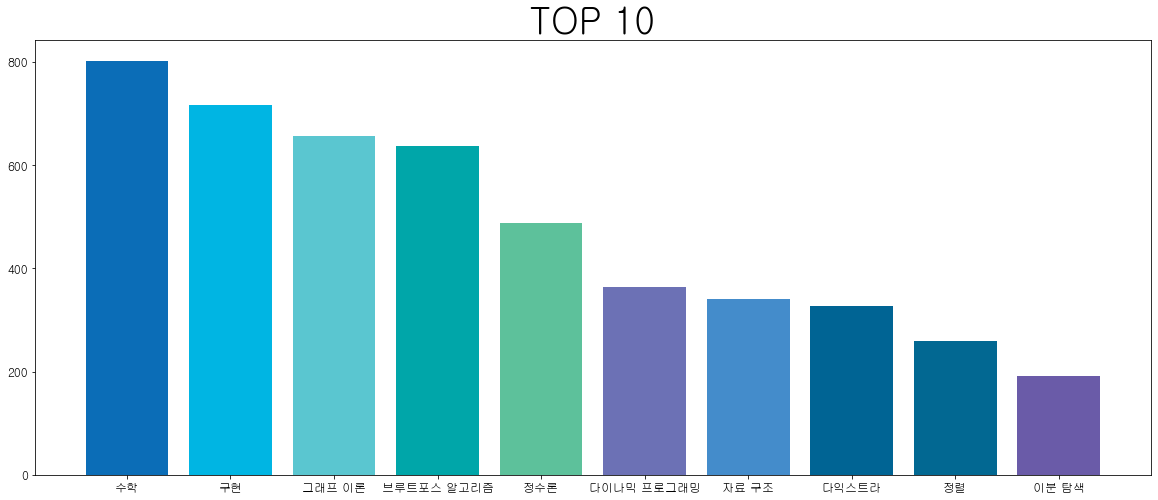

In [15]:
kdf=pd.read_csv('kmjdata.csv')
kind_of_kdf={}
for kind in kdf['분류']:
    if kind!='없음':
        temp=kind.split('/')
        for k in temp:
            if k in kind_of_kdf:
                kind_of_kdf[k]+=1
            else:
                kind_of_kdf[k]=1
            
kind_of_set_kdf=sorted(kind_of_kdf.items(), key=lambda x: x[1], reverse=True)
top_ten=0
keys_kdf=[]
values_kdf=[]
for item in kind_of_set_kdf:
    keys_kdf.append(item[0])
    values_kdf.append(item[1])
    top_ten+=1
    if top_ten>=10:
        break
        
plt.figure(figsize=(20,8))
plt.rc('font', size=12)   
plt.bar(range(10),values,color = ['#0B6DB7','#00B5E3','#5AC6D0',
                                  '#00A6A9','#5DC19B','#6C71B5','#448CCB','#006494','#026892','#6A5BA8'])
plt.xticks(range(10),keys_kdf) 
plt.rc('font', size=30) 
plt.title('TOP 10')
plt.show()

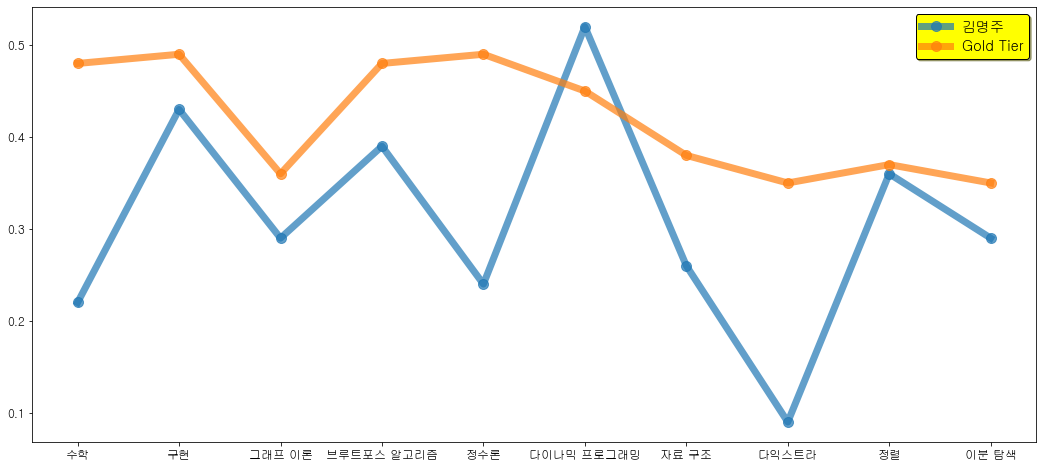

In [48]:
gold_avg=[]
for i in keys_kdf:
    gold_avg.append(round(kind_of_s[i]/kind_of[i],2))

kind_of_s_kdf={}
for i in range(len(kdf)):
    if kdf['정답'][i]=="맞았습니다!!":
        temp=kdf['분류'][i].split('/')
        for k in temp:
            if k in kind_of_s_kdf:
                kind_of_s_kdf[k]+=1
            else:
                kind_of_s_kdf[k]=1
ans_kdf=[]
for i in range(len(keys_kdf)):
    ans_kdf.append(kind_of_s_kdf[keys_kdf[i]]/values_kdf[i])
    
ans_kdf=list(map(lambda x:round(x,2),ans_kdf))

plt.figure(figsize=(18,8))
plt.plot(keys_kdf,ans_kdf, linewidth=7, alpha=0.7, marker="o", markersize=10, label="김명주")
plt.plot(keys_kdf,gold_avg, linewidth=7, alpha=0.7, marker="o", markersize=10, label="Gold Tier")
plt.legend(fontsize='large',facecolor='yellow',edgecolor='black',shadow=True)
plt.show()


# 카카오 코딩 테스트 유형

{'문자열': 12, '구현': 16, '정렬': 3, '브루트포스': 9, '자료구조': 4, '해시': 4, '그리디': 1, '너비 우선 탐색': 5, '그래프 이론': 8, '수학': 3, '스택': 1, '깊이 우선 탐색': 5, '백트래킹': 2, '분할 정복': 3, '세그먼트 트리': 1, '이분탐색': 2, '투포인터': 1, '정규식': 2, '다이나믹 프로그래밍': 5, '다익스트라': 3, '플로이드 와샬': 1, '이진탐색': 1, '비트마스킹': 1, '우선순위 큐': 1, 'LRU': 1, '트리': 1, '원형탐색': 1}


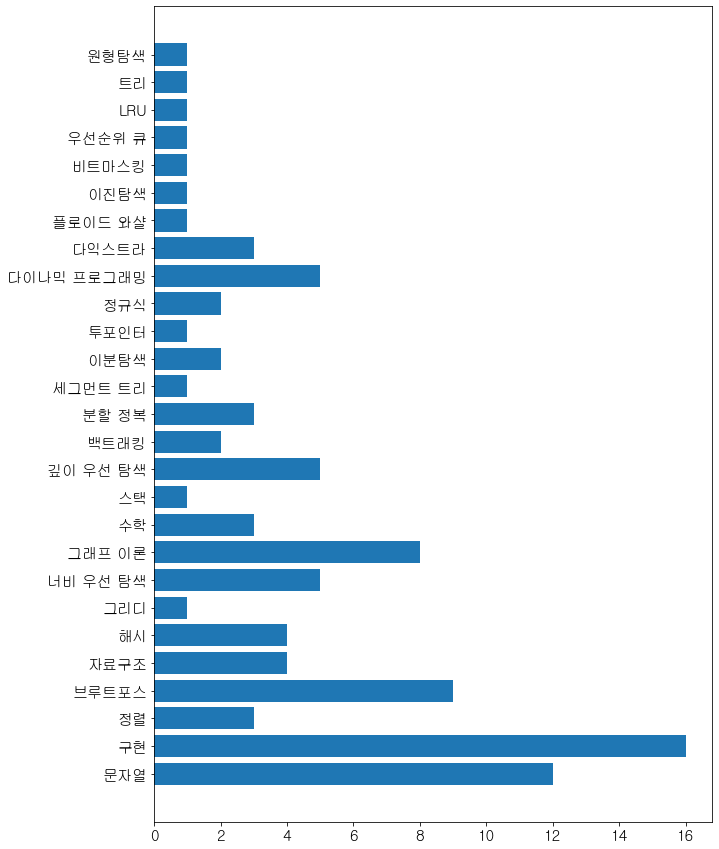

In [65]:
df_kakao=pd.read_csv('kakao.csv')
kakao_kind={}
for kind in df_kakao['분류']:
    if kind!='없음':
        temp=kind.split('/')
        for k in temp:
            if k in kakao_kind:
                kakao_kind[k]+=1
            else:
                kakao_kind[k]=1
print(kakao_kind)

#kind_of_set_kdf=sorted(kind_of_kdf.items(), key=lambda x: x[1], reverse=True)
#top_ten=0
keys_kakao=[]
values_kakao=[]
for item in kakao_kind:
    keys_kakao.append(item)
    values_kakao.append(kakao_kind[item])
plt.rc('font', size=15) 
plt.figure(figsize=(10,15))
plt.barh(keys_kakao,values_kakao)
plt.show()